# Introduction 

The purpose of this Jupyter Notebook is to illustrate key processes in our software pipeline that utlilizes NWB. Our hope is that this notebook can serve as a tutorial on reading and extracting data from an NWB file. 

* Author: [Nand Chandravadia](mailto:nandc10@ucla.edu)

In [8]:
import numpy as np
from pathlib import Path
import pandas as pd
import os
import sys
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
#from nwbwidgets import nwb2widget
import seaborn as sns
import RutishauserLabtoNWB.events.newolddelay.python.analysis.helper as helper
import RutishauserLabtoNWB.events.newolddelay.python.analysis.single_neuron as single_neuron

In [2]:
# Input Path to the NWB file here:
pathtoNWBFile = 'V:/LabUsers/chandravadian/NWB Data/test/P9HMH_NOID5.nwb'
nwbBasePath = Path(pathtoNWBFile)


In [2]:
#Read the nwb file 
io = NWBHDF5IO(str(nwbBasePath), mode='r')
nwb = io.read()

#Get the fields within the NWB file
nwbFields = nwb.fields
print('These are the top-level Groups within the NWB file: {}\n'.format(nwbFields.keys()))

#Get Meta-Data from NWB file 
print('The experiment within this NWB file was conducted at {} in the lab of {}. The experiment is detailed as follows: {}'.format(nwb.institution, nwb.lab, nwb.experiment_description))

These are the top-level Groups within the NWB file: dict_keys(['acquisition', 'analysis', 'scratch', 'stimulus', 'stimulus_template', 'processing', 'devices', 'electrode_groups', 'imaging_planes', 'ic_electrodes', 'ogen_sites', 'intervals', 'lab_meta_data', 'session_description', 'identifier', 'session_start_time', 'timestamps_reference_time', 'file_create_date', 'keywords', 'epoch_tags', 'electrodes', 'subject', 'trials', 'units', 'experiment_description', 'lab', 'institution', 'data_collection', 'related_publications'])

The experiment within this NWB file was conducted at Hunigton Memorial Hospital in the lab of Rutishauser. The experiment is detailed as follows: The data contained within this file describes a new/old recogntion task performed in patients with intractable epilepsy implanted with depth electrodes and Behnke-Fried microwires in the human Medical Temporal Lobe (MTL).


## Read Data and Meta-data
Here, we read the data and meta-data from the specified NWB file using the NWB read utility. 

The NWB file is composed of various Groups, Datasets, and Attributes. The data and cooresponding meta-data are encapsulated within these Groups. The data are thus organized according to these Groups. We can also read the data and meta-data within these Groups, and visualize the components within NWB file via the *nwb2widget* utility -- the following illustrates this process:

Text(0,0.5,'μV')

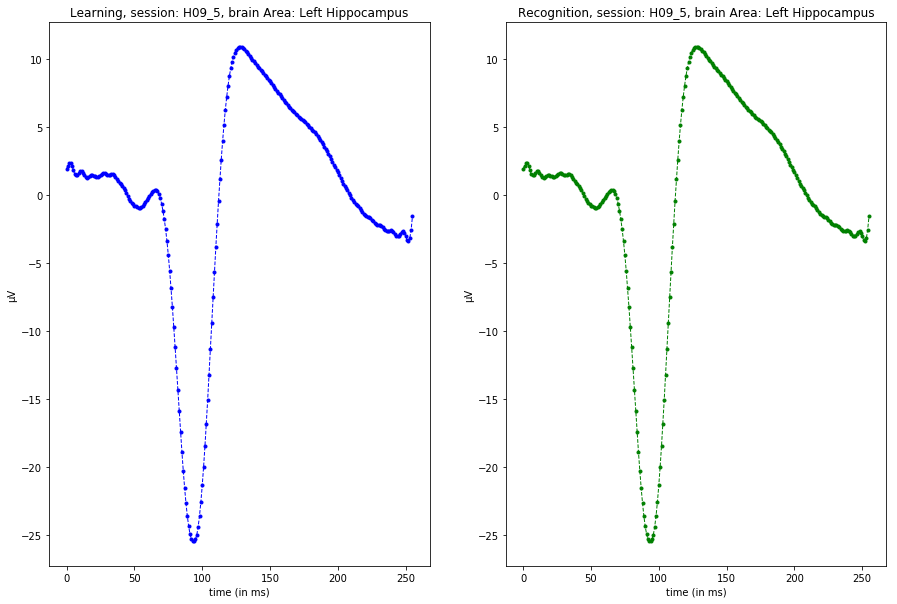

In [4]:
##Plot the Waveforms from the NWB file

#Which channel_index to plot? 
channel_index = [0]

# get Waveform Means from the NWB file
allwaveformLearn = np.asarray(nwb.units['waveform_mean_encoding'].data)
allwaveformRecog = np.asarray(nwb.units['waveform_mean_recognition'].data)

# Choose Which Channel Index to Plot
waveformLearn = allwaveformLearn[channel_index, :][0]
waveformRecog = allwaveformLearn[channel_index, :][0]

#get brain Areas
brainAreas = np.asarray(nwb.electrodes['location'].data)


#Plot the mean waveforms

fig, axes = plt.subplots(1, 2, figsize = (15, 10)) 

#Plot Learning
axes[0].plot(range(len(waveformLearn)), waveformLearn, color = 'blue', marker = 'o', linestyle='dashed',
            linewidth=1, markersize=3)
axes[0].set_title('Learning, session: {}, brain Area: {}'.format(nwb.identifier, brainAreas[channel_index][0]))
axes[0].set_xlabel('time (in ms)')
axes[0].set_ylabel('\u03BCV')


#Plot Recog
axes[1].plot(range(len(waveformRecog)), waveformRecog, color = 'green', marker = 'o', linestyle='dashed',
            linewidth=1, markersize=3)
axes[1].set_title('Recognition, session: {}, brain Area: {}'.format(nwb.identifier, brainAreas[channel_index][0]))
axes[1].set_xlabel('time (in ms)')
axes[1].set_ylabel('\u03BCV')




## Extracting and Plotting the Mean Waveform(s)

To extract the mean waveform, we simply call waveform_mean_encoding from the \units table -- *nwb.units['waveform_mean_encoding']*. The brain area of each of the electrodes is located within the \electrodes table -- *nwb.electrodes['location']*. To see the relationship bewteen the \units and \electrodes table, see **Figure 2b** in our data descriptor. 

Text(0.5,1,'Response times for all trials, accuracy: 0.72')

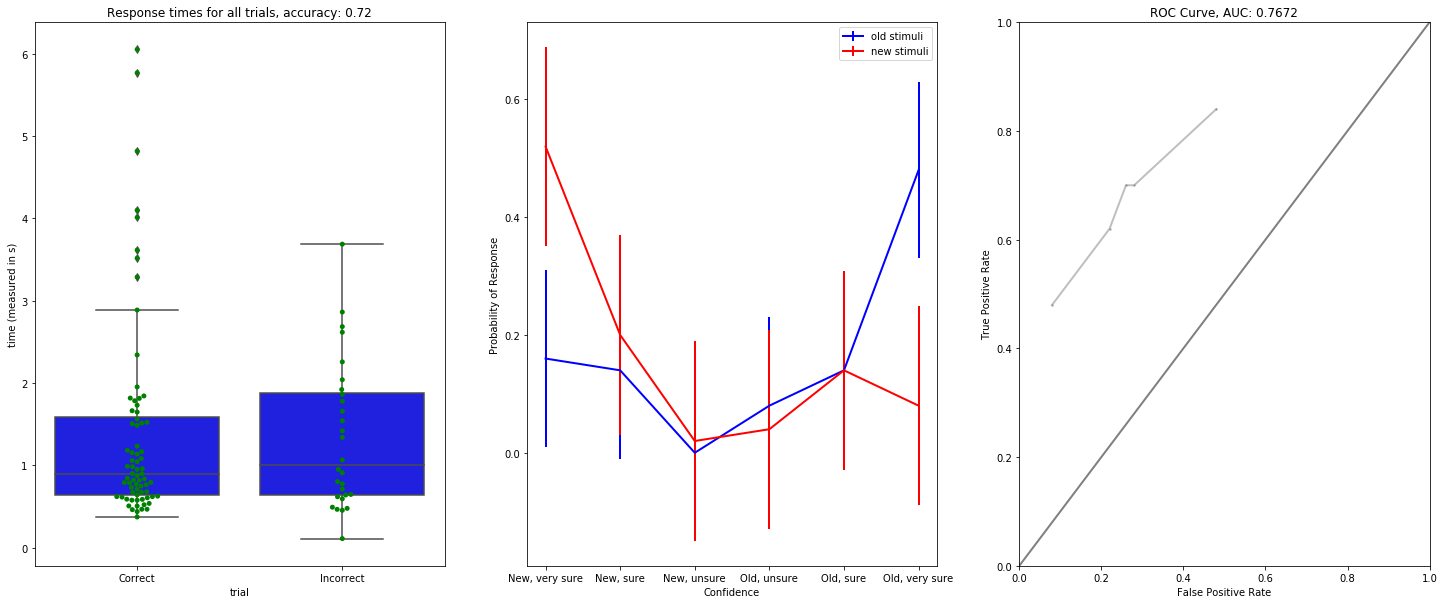

In [5]:
#Plot Behavior from NWB file 

# == Plot ROC curve == 
fig, axes = plt.subplots(1, 3, figsize = (25, 10))
# Calculate the cumulative d and plot the cumulative ROC curve
stats_all = helper.cal_cumulative_d(nwb)
# Calculate the auc
auc = helper.cal_auc(stats_all)
x = stats_all[0:5, 4]
y = stats_all[0:5, 3]
axes[2].plot(x, y, marker='.', color='grey', alpha=0.5, linewidth=2, markersize=3)
axes[2].set_ylim(0, 1)
axes[2].set_xlim(0, 1)
axes[2].set_title('ROC Curve, AUC: {}'.format(auc))
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].plot([0, 1], [0, 1], color='black', alpha=0.5, linewidth=2)


#Get the recognition responses
recog_response = helper.extract_recog_responses(nwb)
ground_truth = helper.extract_new_old_label(nwb)
#Get the recognition responses for the 'old' stimuli
recog_response_old = recog_response[ground_truth == 1]

# Place holder ready to store separate the new and old response
response_1_old = []
response_2_old = []
response_3_old = []
response_4_old = []
response_5_old = []
response_6_old = []

response_1_new = []
response_2_new = []
response_3_new = []
response_4_new = []
response_5_new = []
response_6_new = []


# Calculate the percentage of each responses
response_1_old.append(np.sum(recog_response_old == 1) / len(recog_response_old))
response_2_old.append(np.sum(recog_response_old == 2) / len(recog_response_old))
response_3_old.append(np.sum(recog_response_old == 3) / len(recog_response_old))
response_4_old.append(np.sum(recog_response_old == 4) / len(recog_response_old))
response_5_old.append(np.sum(recog_response_old == 5) / len(recog_response_old))
response_6_old.append(np.sum(recog_response_old == 6) / len(recog_response_old))

recog_response_new = recog_response[ground_truth == 0]
response_1_new.append(np.sum(recog_response_new == 1) / len(recog_response_new))
response_2_new.append(np.sum(recog_response_new == 2) / len(recog_response_new))
response_3_new.append(np.sum(recog_response_new == 3) / len(recog_response_new))
response_4_new.append(np.sum(recog_response_new == 4) / len(recog_response_new))
response_5_new.append(np.sum(recog_response_new == 5) / len(recog_response_new))
response_6_new.append(np.sum(recog_response_new == 6) / len(recog_response_new))


# Plot the percentage responses
response_old = np.asarray([response_1_old, response_2_old, response_3_old, response_4_old,
                               response_5_old, response_6_old])
response_new = np.asarray([response_1_new, response_2_new, response_3_new, response_4_new,
                               response_5_new, response_6_new])

n = 1
response_percentage_old = np.mean(response_old, axis=1)
std_old = np.std(response_old)
se_old = std_old/np.sqrt(n)
response_percentage_new = np.mean(response_new, axis=1)
std_new = np.std(response_new)
se_new = std_new/np.sqrt(n)

#x = [i for i in range(1, 7, 1)]
x = ['New, very sure', 'New, sure', 'New, unsure', 'Old, unsure', 'Old, sure', 'Old, very sure']
axes[1].errorbar(x, response_percentage_old, yerr=se_old, color='blue', label='old stimuli', linewidth = 2)
axes[1].errorbar(x, response_percentage_new, yerr=se_new, color='red', label='new stimuli', linewidth = 2)
axes[1].legend()
axes[1].set_xlabel('Confidence')
axes[1].set_ylabel('Probability of Response')



# == Plot the Response Times for correct vs. incorrect responses == 

events_learn, timestamps_learn, events_recog, timestamps_recog = helper.get_event_data(nwb)

data_events = {'events_recog': events_recog, 'timestamps_recog': timestamps_recog}
recog = pd.DataFrame(data_events) 

index_questionScreenOnset = list(np.where(recog['events_recog'] == 3)) #question screen onset

response_recog = helper.extract_recog_responses(nwb)
ground_truth = helper.extract_new_old_label(nwb)
correct_ind, incorrect_ind = helper.correct_incorrect_indexes(recog_response, ground_truth)

responseTimesRecogCorrect = []
responseTimesRecogIncorrect = []

#Get response times for correct trials, from question screen onset
for a in index_questionScreenOnset[0][correct_ind]: 
    responseTime = recog.iloc[a+1, 1] - recog.iloc[a, 1]
    responseTimesRecogCorrect.append(responseTime)
    
#Get response times for incorrect trials, from question screen onset
for a in index_questionScreenOnset[0][incorrect_ind]: 
    responseTime = recog.iloc[a+1, 1] - recog.iloc[a, 1]
    responseTimesRecogIncorrect.append(responseTime)

accuracy = len(correct_ind)/len(response_recog)


responseTimesAll = responseTimesRecogCorrect + responseTimesRecogIncorrect
trial_indication = ['Correct']*len(responseTimesRecogCorrect) + ['Incorrect']*len(responseTimesRecogIncorrect)
dict_responseTimes = {'time': responseTimesAll, 'trial': trial_indication}
dataframe_responseTimes = pd.DataFrame(dict_responseTimes)

#Plot Boxplot
sns.boxplot(x = 'trial', y= "time", data = dataframe_responseTimes, ax = axes[0], color = 'b')
sns.swarmplot(x = 'trial', y= "time", data=dataframe_responseTimes, color="g", ax = axes[0])
axes[0].set_ylabel('time (measured in s)')
axes[0].set_title('Response times for all trials, accuracy: {}'.format(accuracy))



## Behavior

We can plot the behavior from the NWB file. The behavioral data is mostly encapsulated within nwb\trials, which includes the trial information such as the start_time and response_time. 

Session_id:  H09_5
Channel:  1
Cell_id:  0
Number of spikes: 573
Session_id:  H09_5
Channel:  2
Cell_id:  1
Number of spikes: 298
Session_id:  H09_5
Channel:  2
Cell_id:  1
Number of spikes: 5547
Session_id:  H09_5
Channel:  3
Cell_id:  2
Number of spikes: 4596
Session_id:  H09_5
Channel:  4
Cell_id:  3
Number of spikes: 2859
Session_id:  H09_5
Channel:  4
Cell_id:  3
Number of spikes: 446
Session_id:  H09_5
Channel:  5
Cell_id:  4
Number of spikes: 4129
Session_id:  H09_5
Channel:  7
Cell_id:  5
Number of spikes: 1125
Session_id:  H09_5
Channel:  8
Cell_id:  6
Number of spikes: 614
Session_id:  H09_5
Channel:  8
Cell_id:  6
Number of spikes: 8023
Session_id:  H09_5
Channel:  18
Cell_id:  7
Number of spikes: 642
Session_id:  H09_5
Channel:  18
Cell_id:  7
Number of spikes: 1881
Session_id:  H09_5
Channel:  19
Cell_id:  8
Number of spikes: 4090
Session_id:  H09_5
Channel:  19
Cell_id:  8
Number of spikes: 531
Session_id:  H09_5
Channel:  20
Cell_id:  9
Number of spikes: 9418
Session_id:

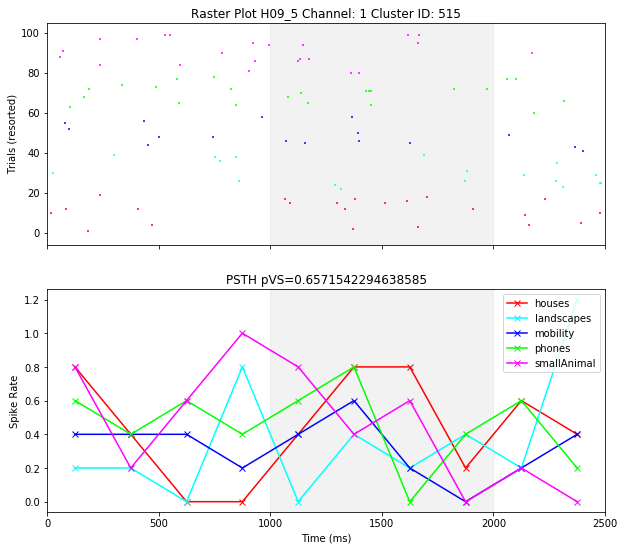

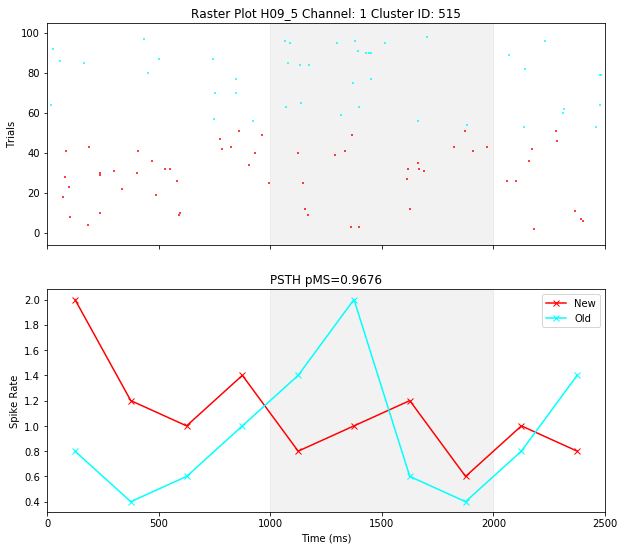

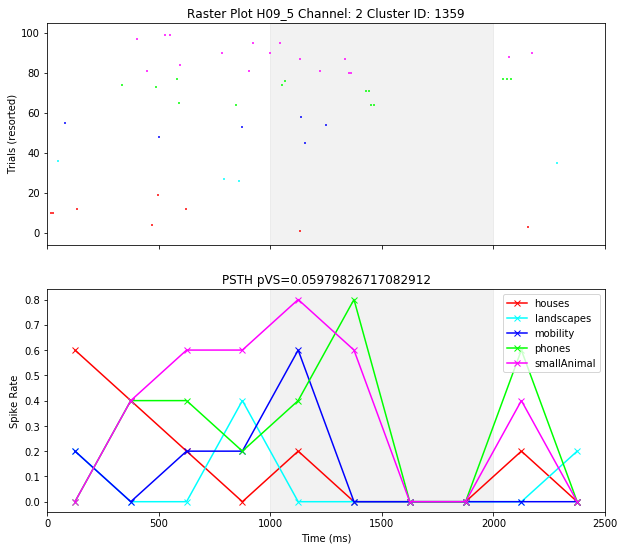

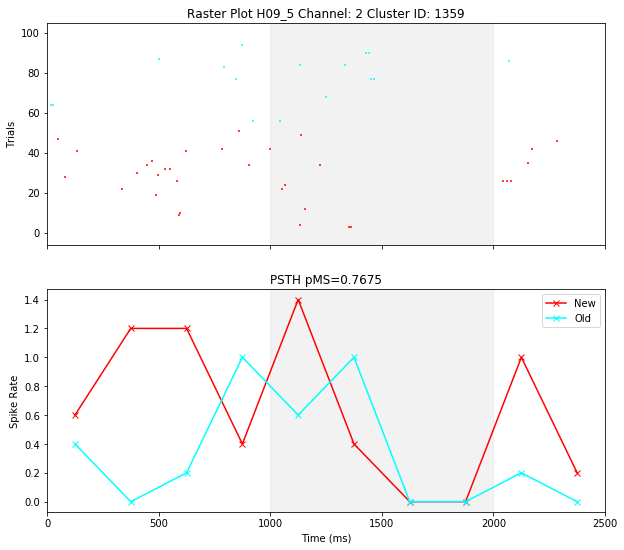

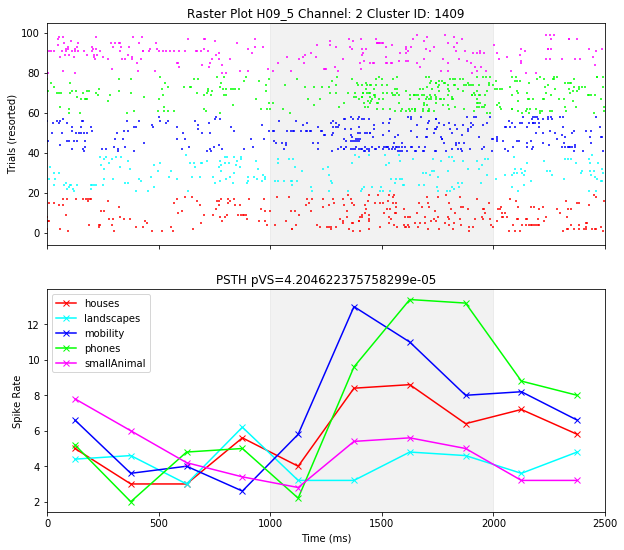

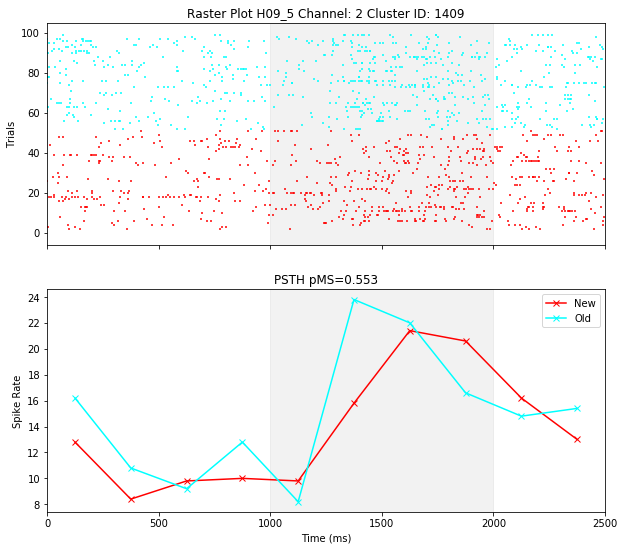

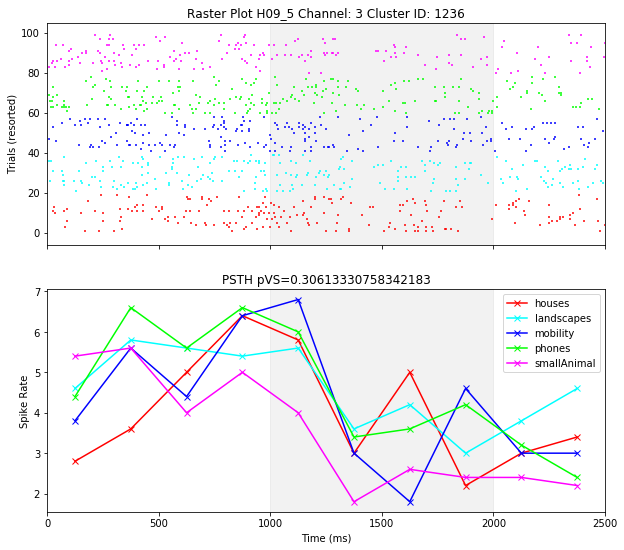

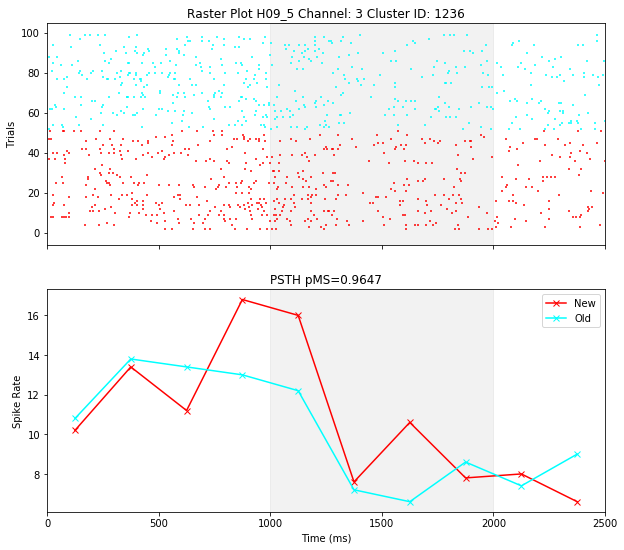

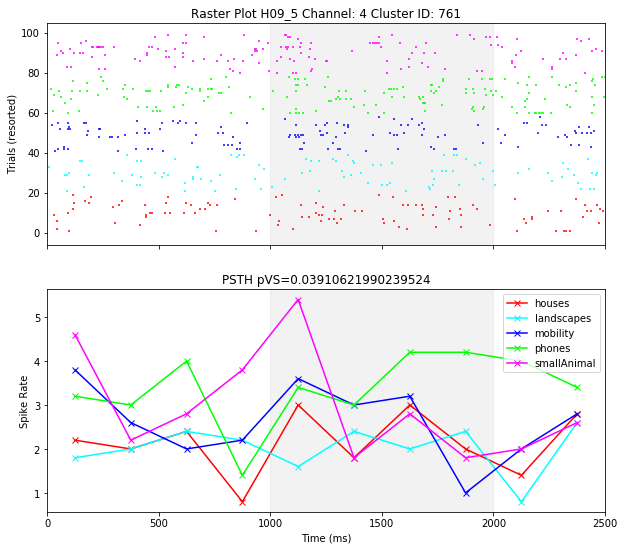

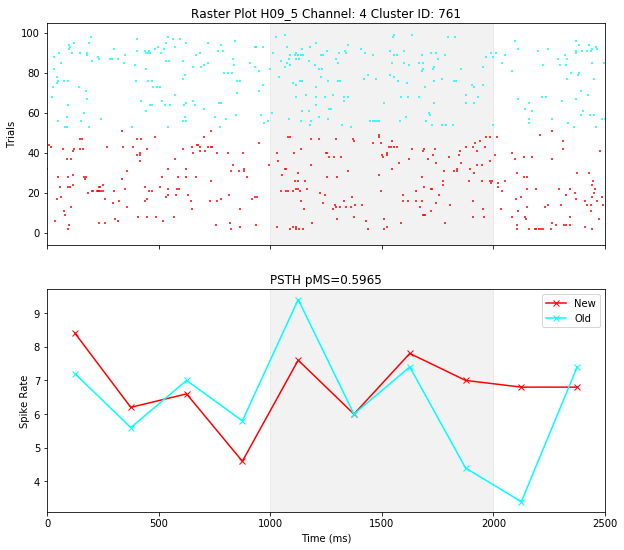

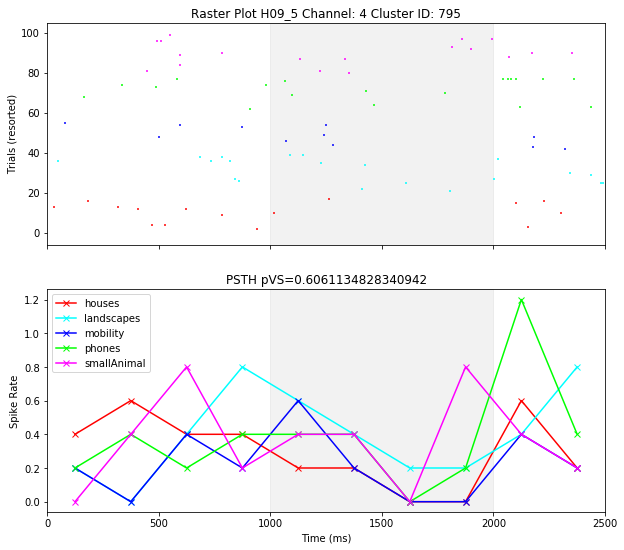

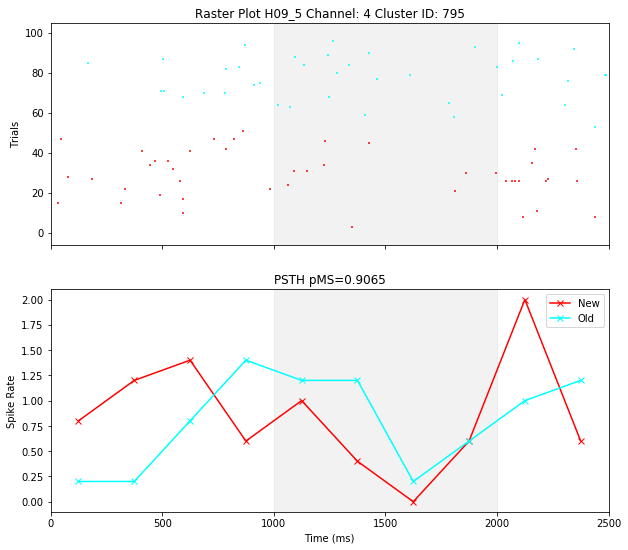

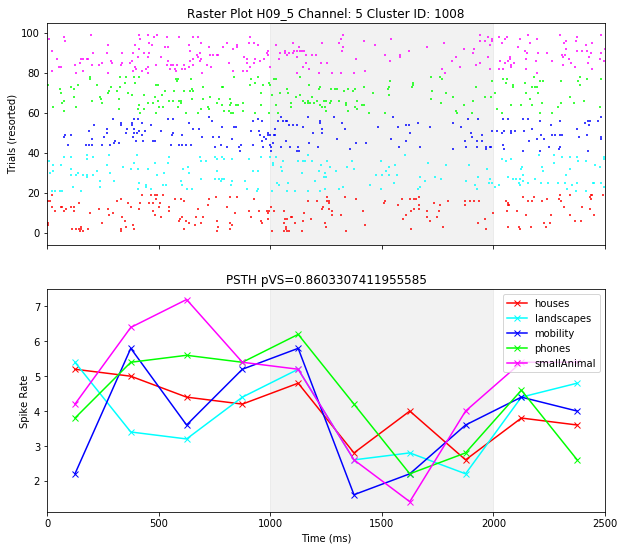

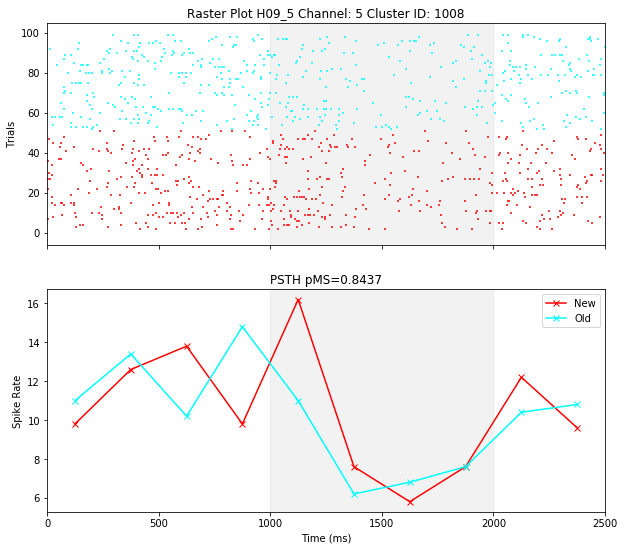

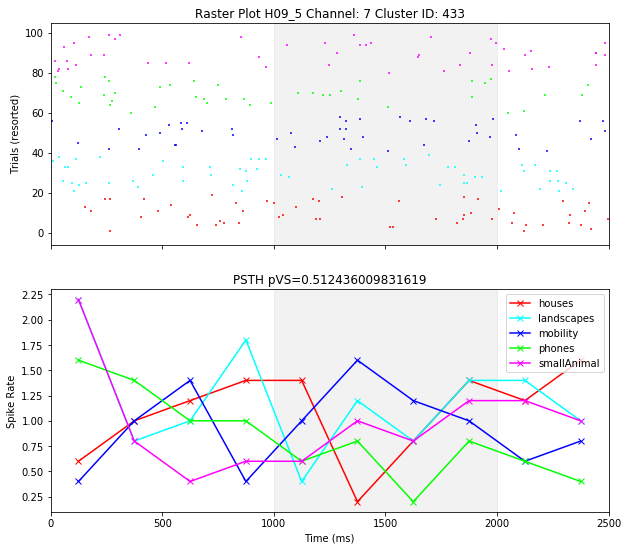

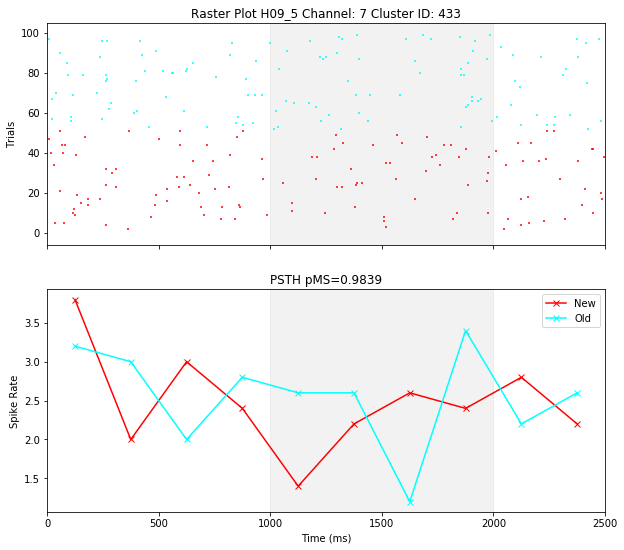

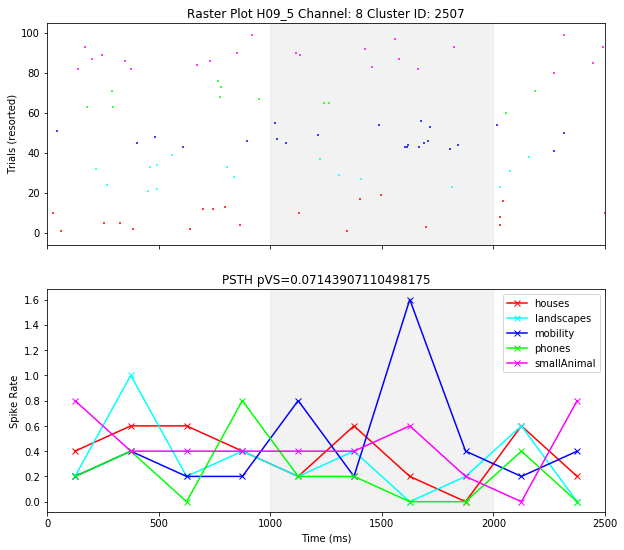

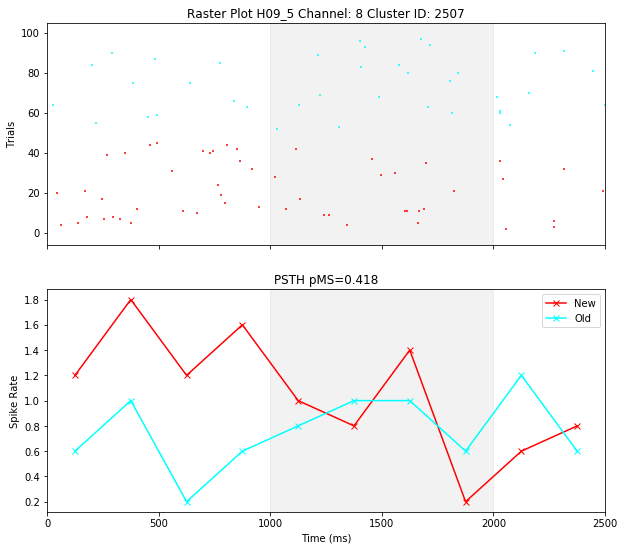

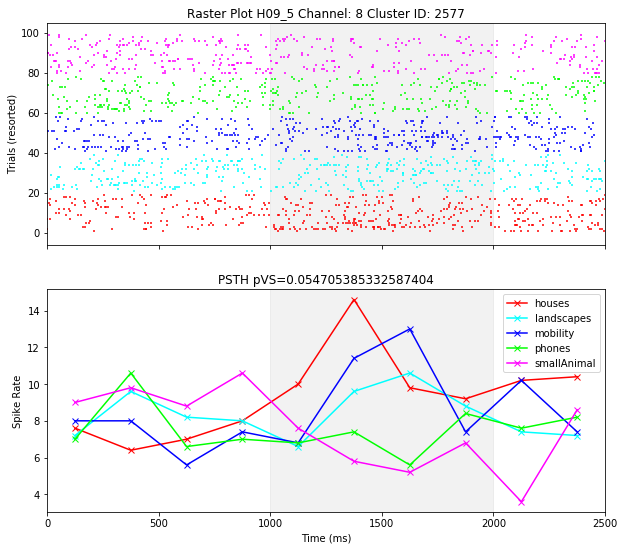

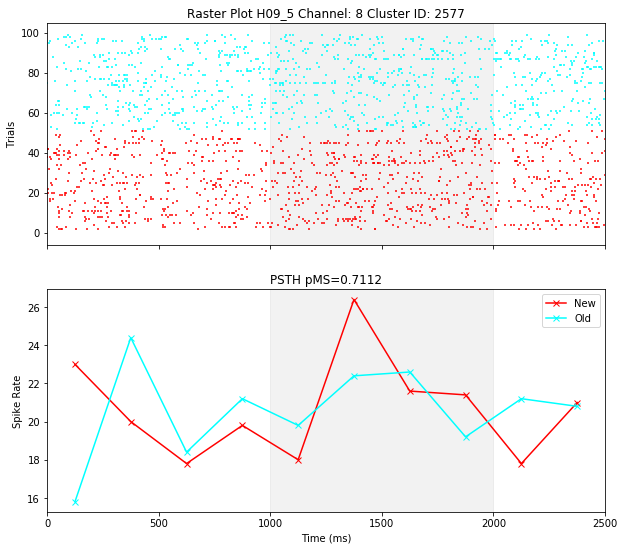

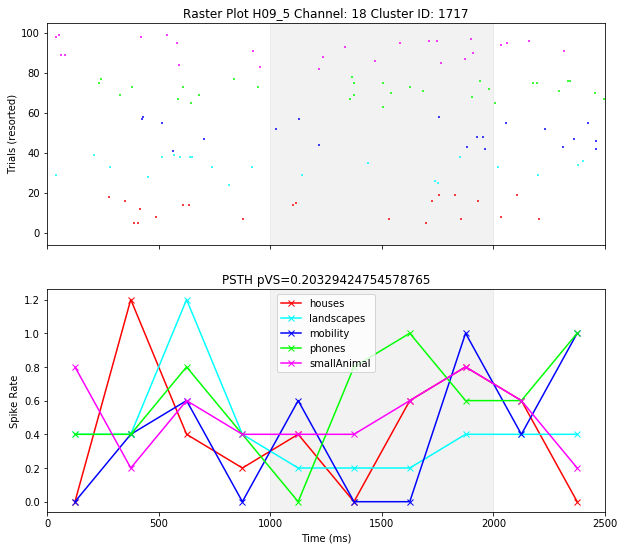

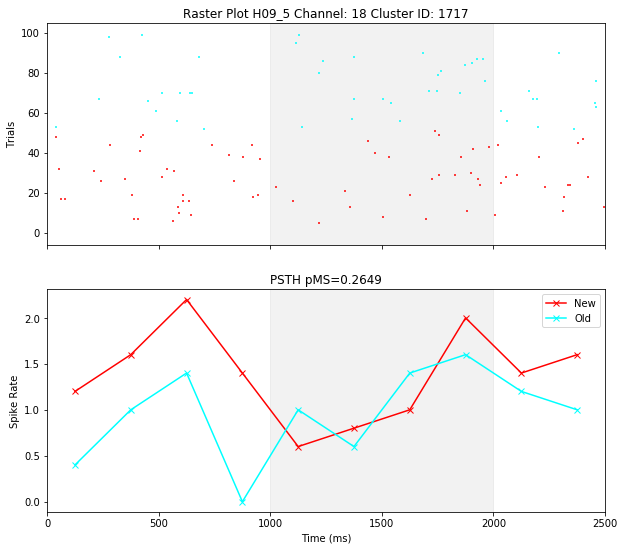

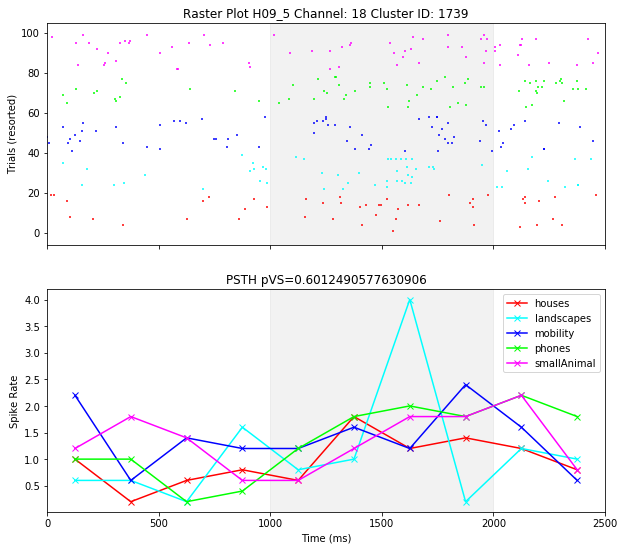

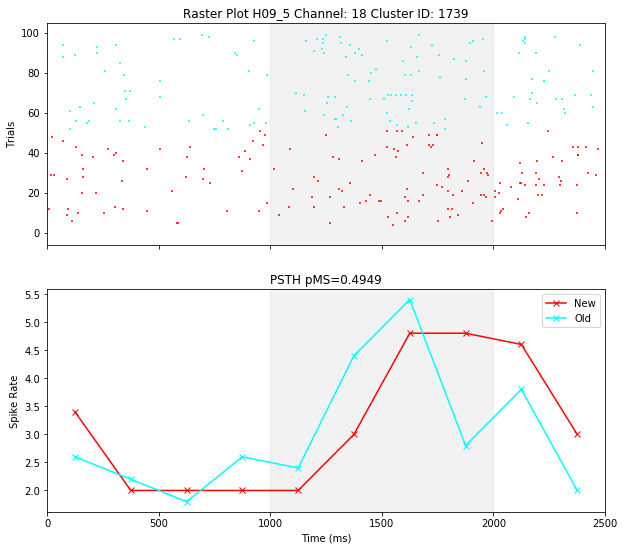

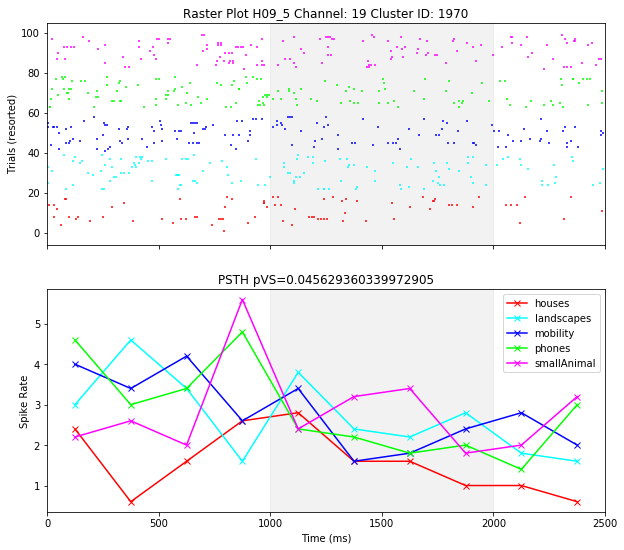

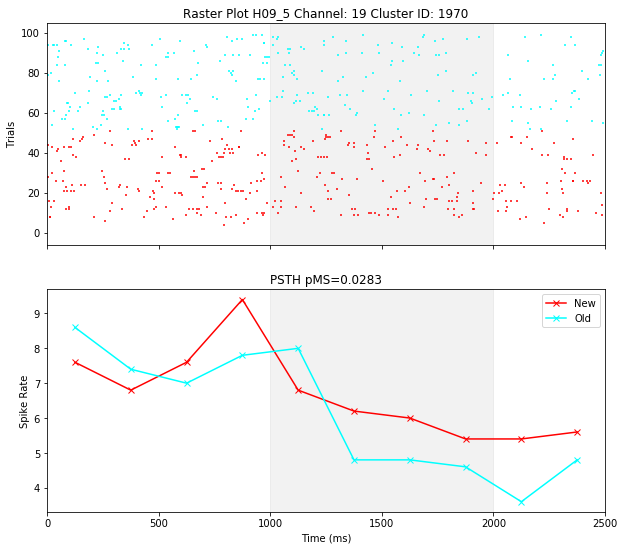

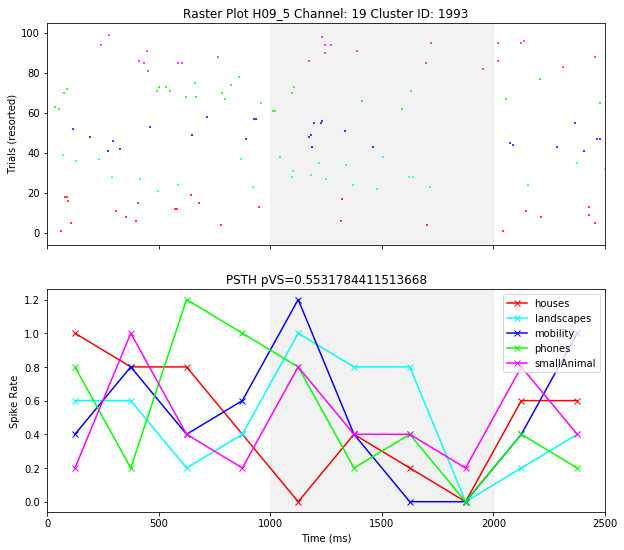

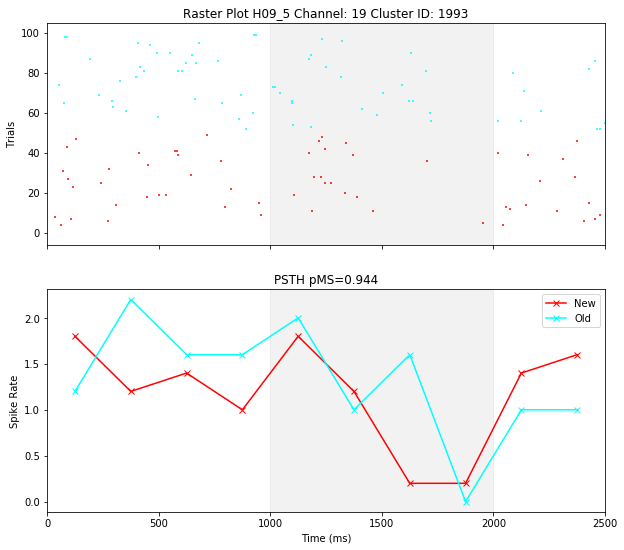

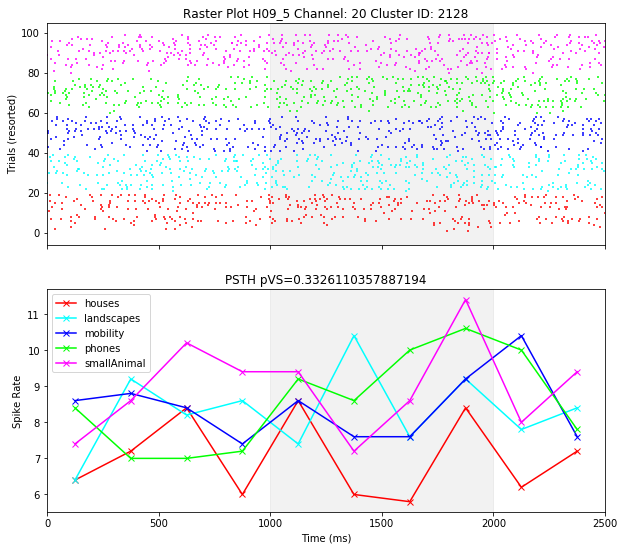

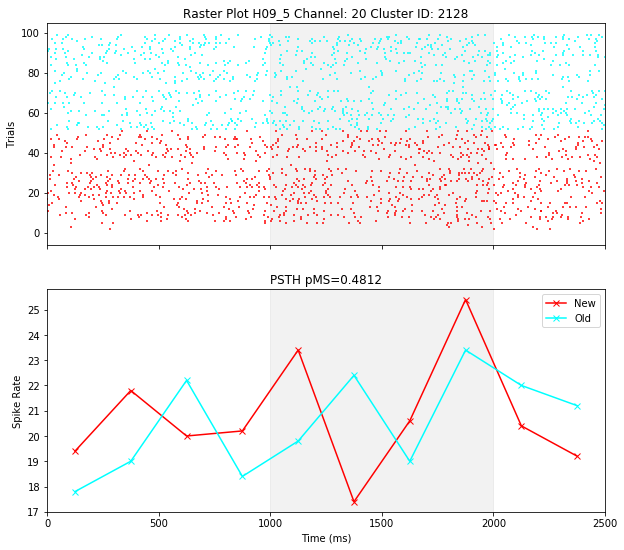

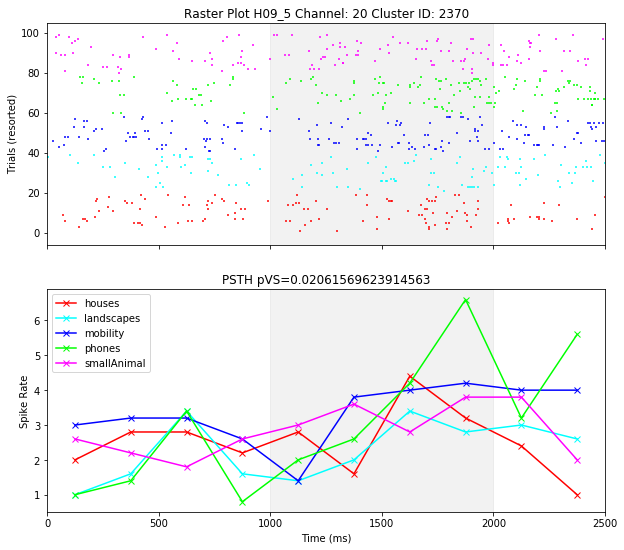

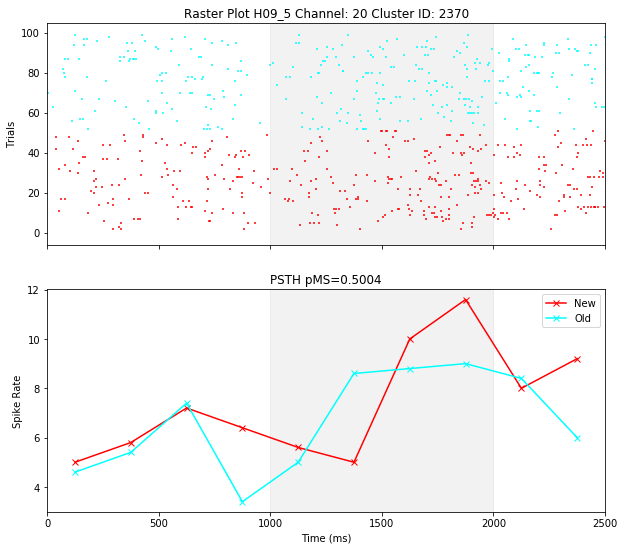

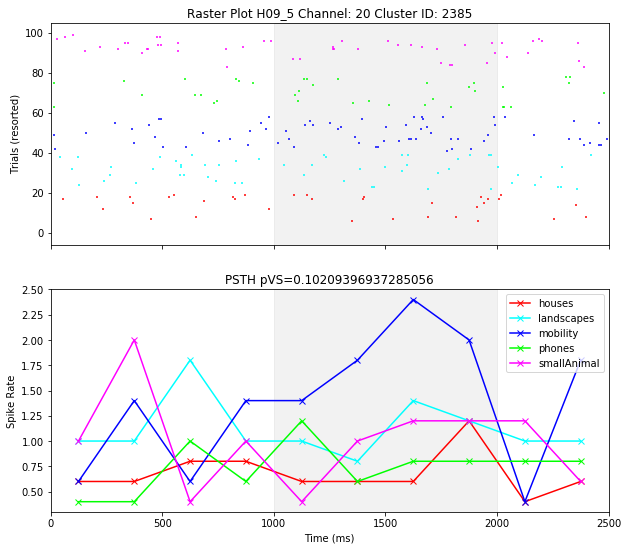

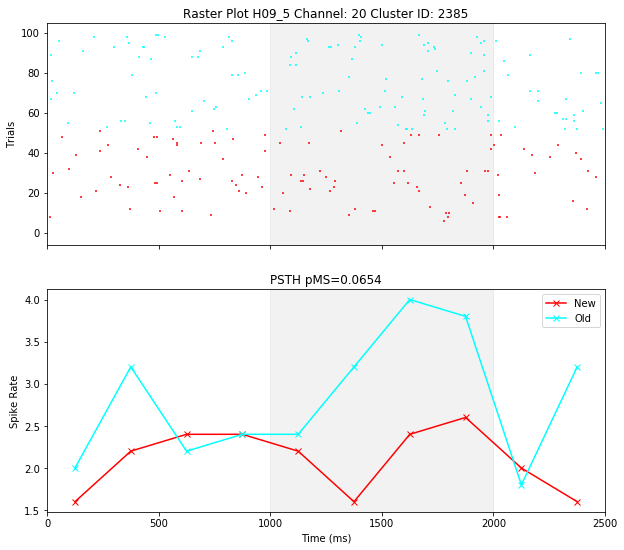

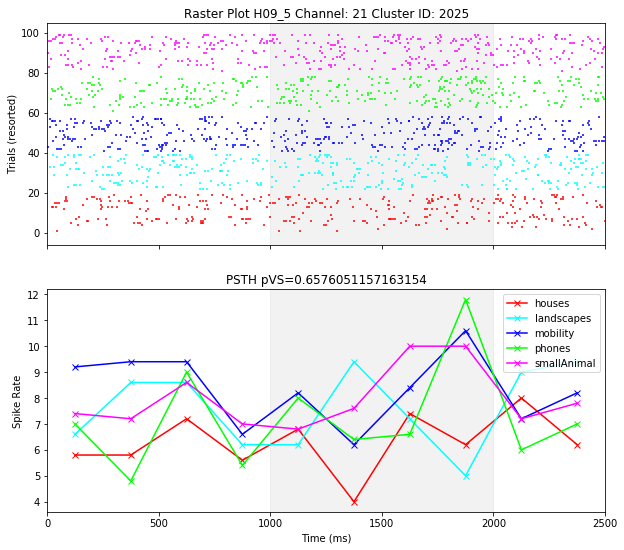

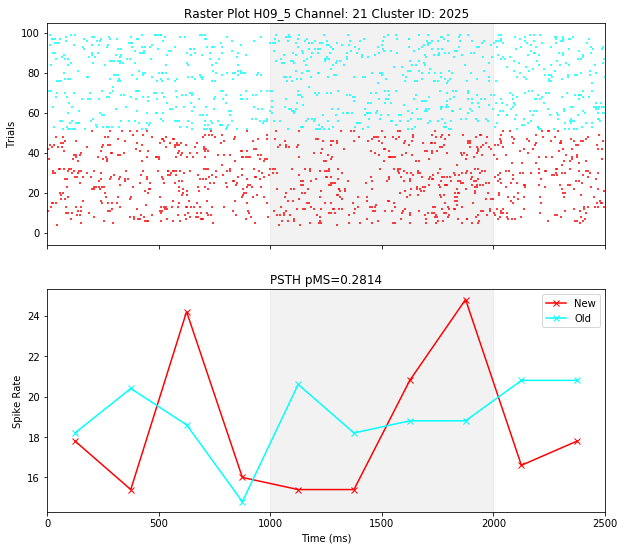

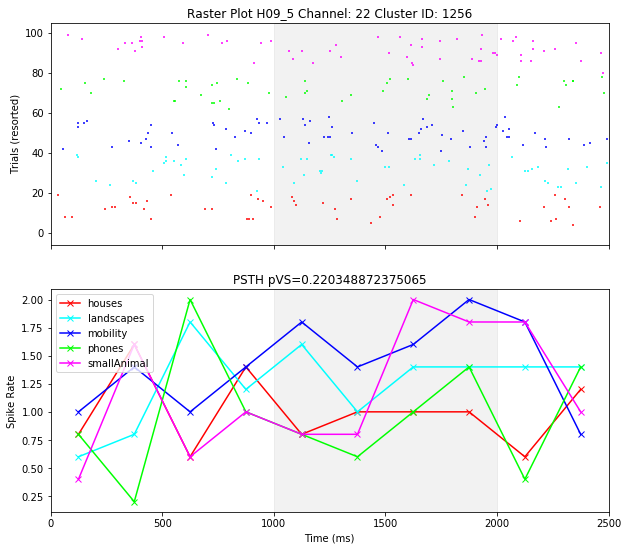

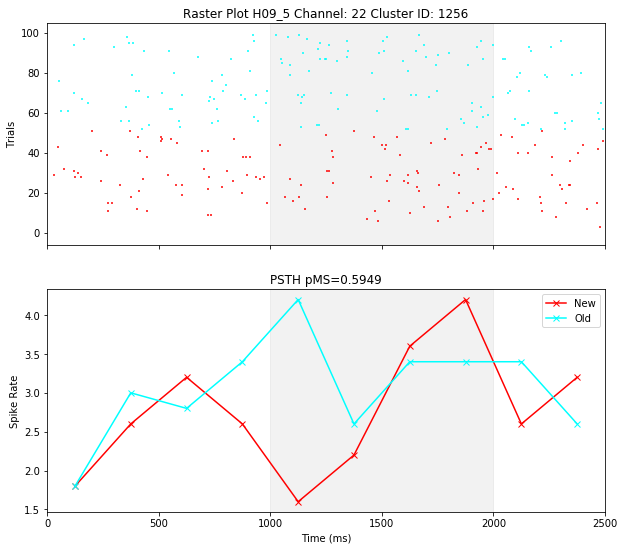

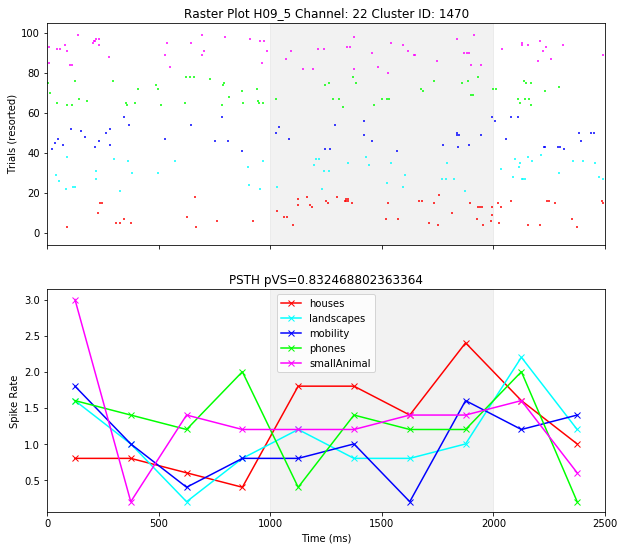

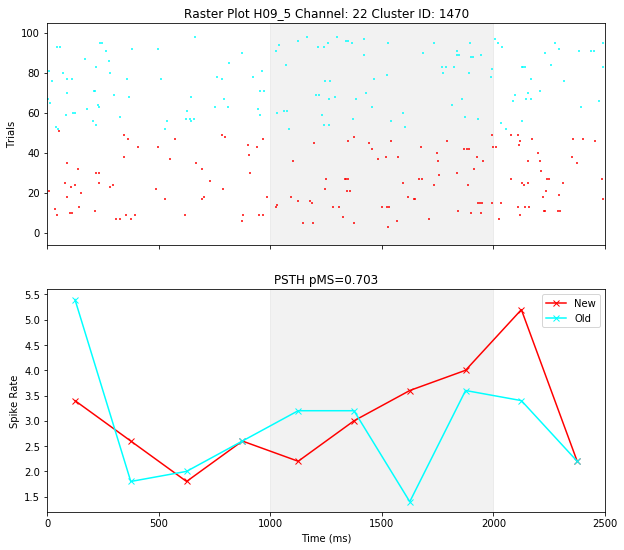

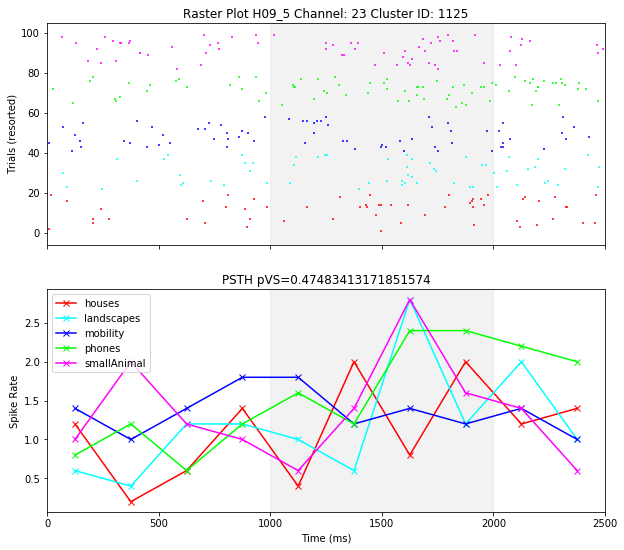

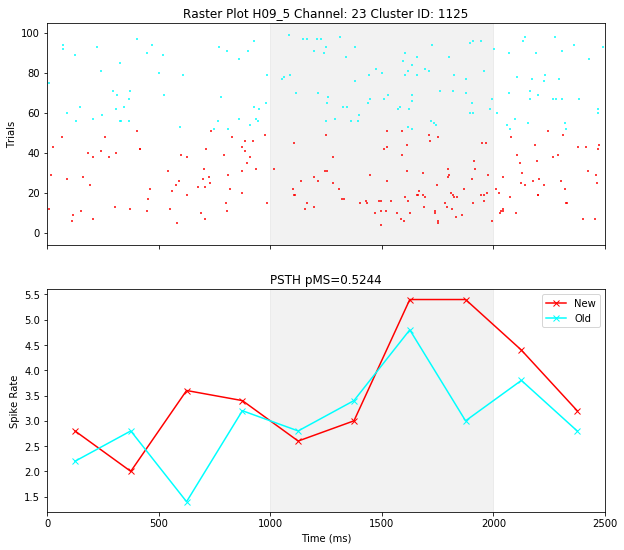

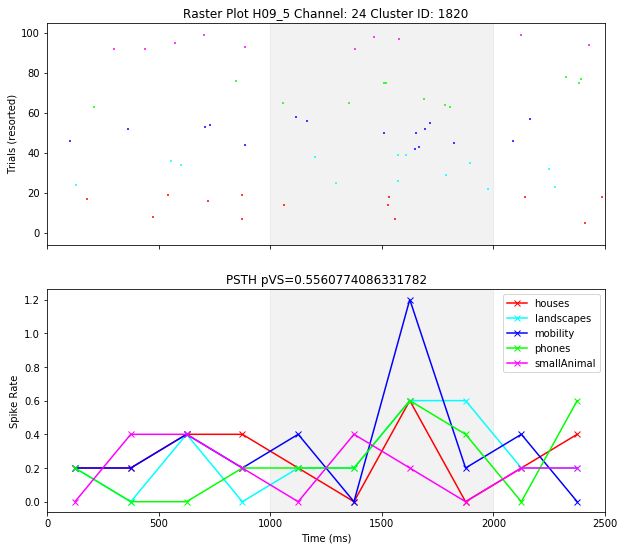

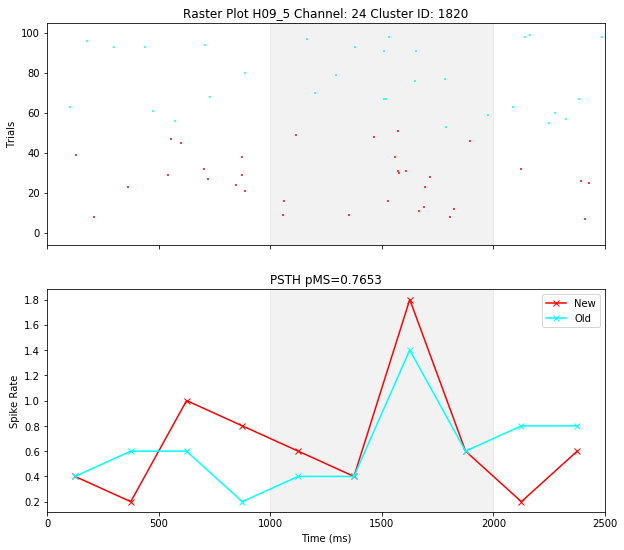

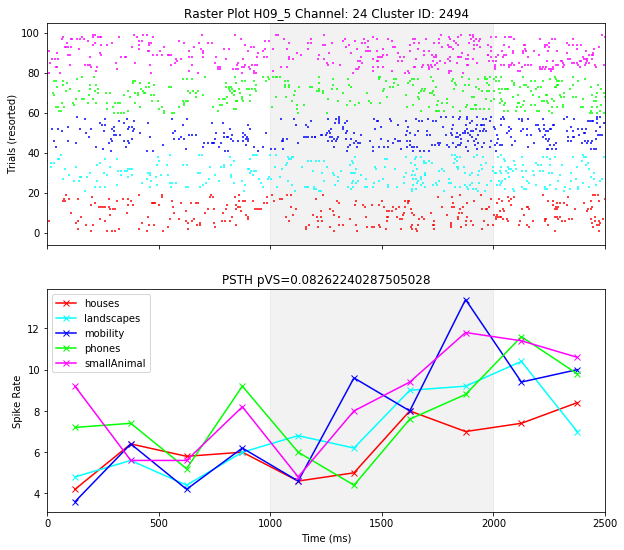

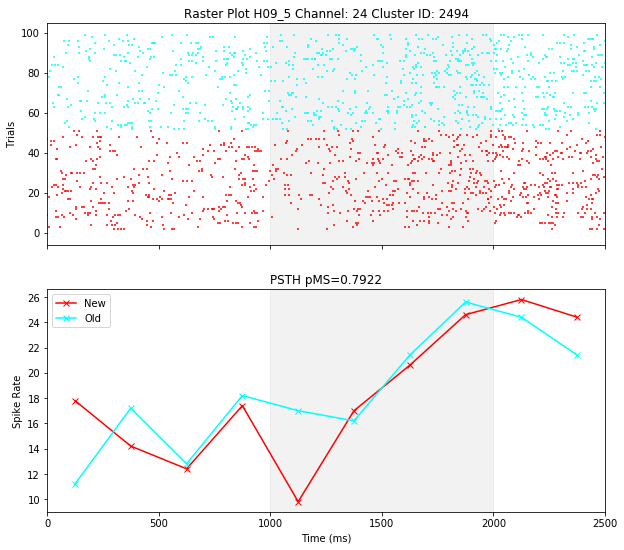

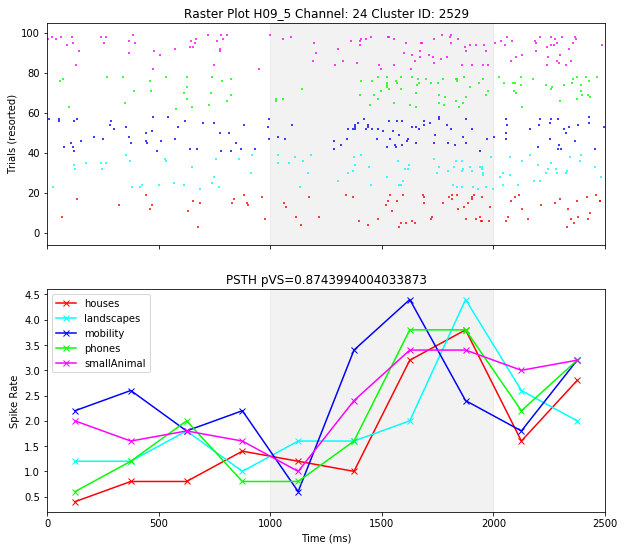

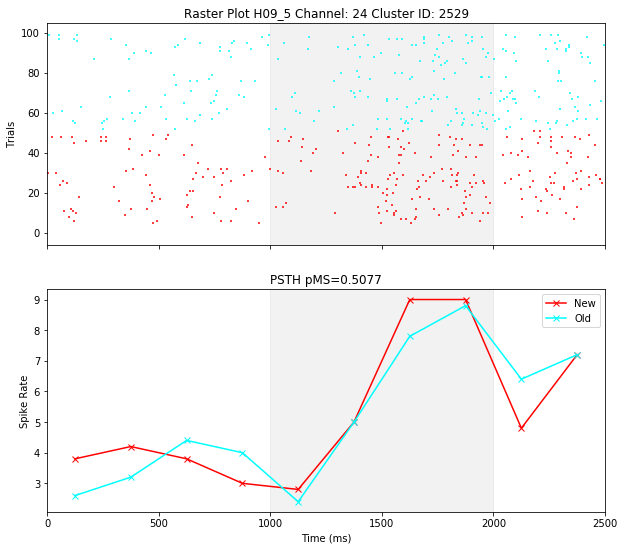

In [6]:
#Plot the Neuron(s)

#Get the spike times from the NWB file 
index = 0
nwb.units.get_unit_spike_times(index)

neurons = single_neuron.extract_neuron_data_from_nwb(nwb)

#Plot all the Neurons
for neuron in neurons:
    neuron.raster_psth(cell_type='visual', bin_size = 250)
    neuron.raster_psth(cell_type = 'memory', bin_size = 250)



## Single Neuron Analysis

Here, we demonstrate how to run single neuron analysis in NWB. We probed for the tuning of two functional cell types, MS and VS cells, Memory Selective, and  Visually Seletive, respectively.
